In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def get_train_val_acc(path):
    tr = pd.read_csv(path + 'train.csv')
    vl = pd.read_csv(path + 'val.csv')
    return (tr, vl)

# Part1

In [23]:
def visualize_part1():
    fbases = [4,6,8]
    wdecays = [0, 0.0025, 0.005, 0.006, 0.0075, 0.01]
    fig, ax = plt.subplots(len(wdecays), len(fbases)+1, figsize=(15,17), dpi=600)
    ax[0,0].set_title('fbase 4 (1)')
    ax[0,1].set_title('fbase 6 (2)')
    ax[0,2].set_title('fbase 8 (3)')
    
    ax[0,0].set_ylabel('wdecay 0')
    ax[1,0].set_ylabel('wdecay .0025')
    ax[2,0].set_ylabel('wdecay .005')
    ax[3,0].set_ylabel('wdecay .006')
    ax[4,0].set_ylabel('wdecay .0075')
    ax[5,0].set_ylabel('wdecay .01')
    
    
    for i,wdecay in enumerate(wdecays):
        train_accs = []
        val_accs = []
        for j,fbase in enumerate(fbases):
            tracc, valacc = get_train_val_acc(f'./logs/_part1/fnb_6--fbase_{fbase}--wdecay_{wdecay}--elu_1--NONE_/')
            ax[i,j].plot(tracc['acc'], label='train')
            ax[i,j].plot(valacc['acc'], label='val')
            ax[i,j].set_ylim(0,1)
            ax[i,j].legend()
            
            train_accs.append(tracc['acc'].values[-1])
            val_accs.append(valacc['acc'].values[-1])
        ax[i,j+1].scatter(train_accs, val_accs)
        for k in range(len(train_accs)):
            ax[i,j+1].annotate(f'({k})', (train_accs[k], val_accs[k]))
        ax[i,j+1].plot(train_accs, train_accs, c='red')
    return fig

In [24]:
a = visualize_part1()

In [25]:
a.savefig('./pics/fbase-wdecay.png')

# Part 2

In [98]:
def visualize_part2():
    wdecay=0.005
    fbases = [3,4,5,6,7,8,9,10,12,16]
    fig, ax = plt.subplots(4, 3, figsize=(12,14), dpi=600)
    
    train_accs = []
    val_accs = []
    
    for i in range(len(fbases)):
        tracc, valacc = get_train_val_acc(f'./logs/_part2/wdecay_{wdecay}/fnb_6--fbase_{fbases[i]}--wdecay_{wdecay}--elu_1--NONE_/')
        ax[i//3,i%3].plot(tracc['acc'], label='train')
        ax[i//3,i%3].plot(valacc['acc'], label='val')
        ax[i//3,i%3].set_ylim(0,1)
        ax[i//3,i%3].legend()
        ax[i//3,i%3].set_title(f'fbase {fbases[i]} ({i})')
            
        train_accs.append(tracc['acc'].values[-1])
        val_accs.append(valacc['acc'].values[-1])
        
    train_accs = np.array(train_accs)
    val_accs = np.array(val_accs)
    i += 1
    ax[i//3,i%3].scatter(train_accs, val_accs)
    for k in range(len(train_accs)):
        ax[i//3,i%3].annotate(f'({k})', (train_accs[k], val_accs[k]))
    ax[i//3,i%3].plot(train_accs, train_accs, c='red')
#     m, b = np.polyfit(train_accs, val_accs, 1)
#     ax[i//3,i%3].plot(train_accs, m*train_accs + b)
    return fig

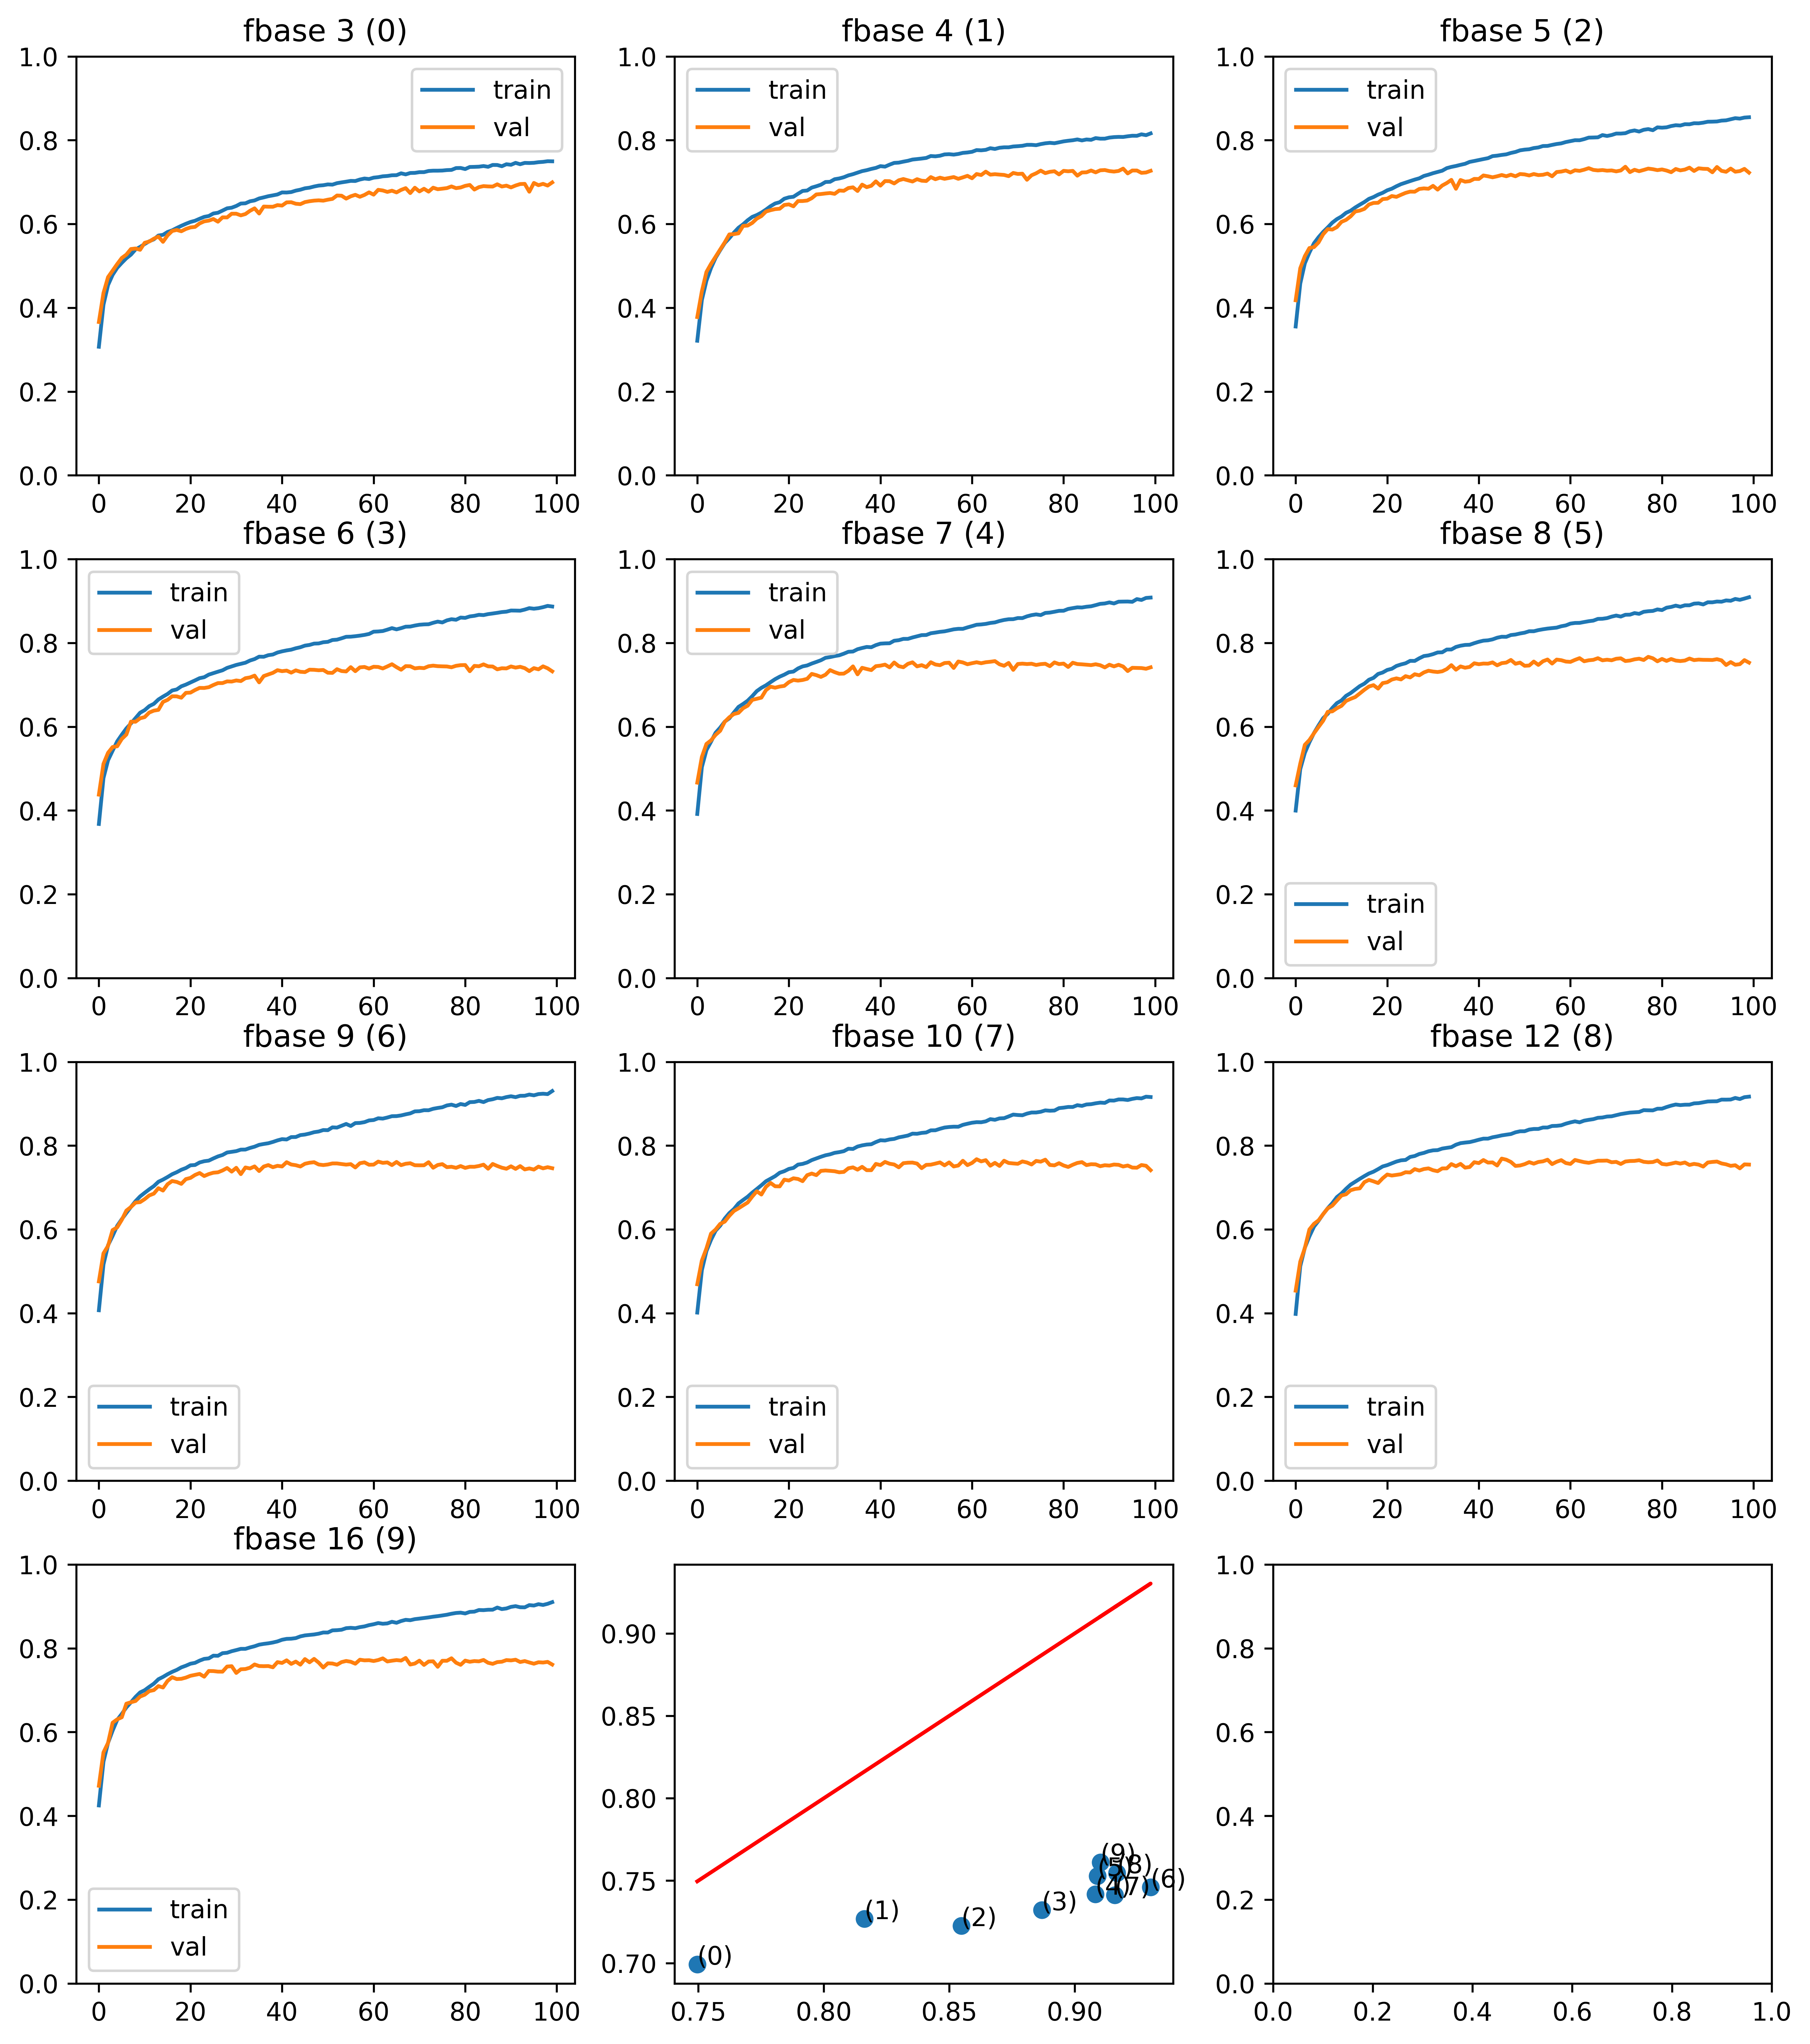

In [99]:
a = visualize_part2()

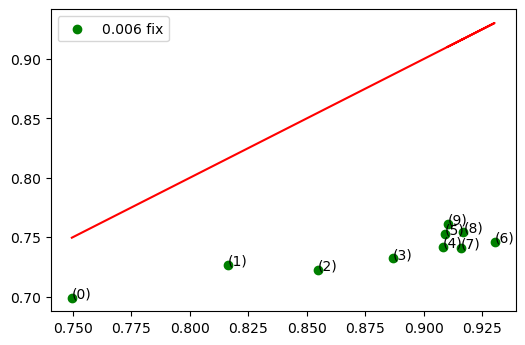

In [89]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# wdecay=0.006
# fbases = [3,4,5,6,7,8,9,10]
# train_accs = []
# val_accs = []
# for i in range(len(fbases)):
#     tracc, valacc = get_train_val_acc(f'./logs/_part2/wdecay_{wdecay}/fnb_6--fbase_{fbases[i]}--wdecay_{wdecay}--elu_1--NONE_/')
#     train_accs.append(tracc['acc'].values[-1])
#     val_accs.append(valacc['acc'].values[-1])
# train_accs = np.array(train_accs)
# val_accs = np.array(val_accs)
# ax.scatter(train_accs, val_accs, c='b', label='0.006')
# for k in range(len(train_accs)):
#     ax.annotate(f'({k})', (train_accs[k], val_accs[k]))
# ax.plot(train_accs, train_accs, c='red')


wdecay=0.005
fbases = [3,4,5,6,7,8,9,10,12,16]
train_accs = []
val_accs = []
for i in range(len(fbases)):
    tracc, valacc = get_train_val_acc(f'./logs/_part2/wdecay_{wdecay}/fnb_6--fbase_{fbases[i]}--wdecay_{wdecay}--elu_1--NONE_/')
    train_accs.append(tracc['acc'].values[-1])
    val_accs.append(valacc['acc'].values[-1])
train_accs = np.array(train_accs)
val_accs = np.array(val_accs)
ax.scatter(train_accs, val_accs, c='g', label='0.006 fix')
for k in range(len(train_accs)):
    ax.annotate(f'({k})', (train_accs[k], val_accs[k]))
ax.plot(train_accs, train_accs, c='red')

ax.legend()

In [100]:
a.savefig('./pics/tmp.png')

# Part 3

In [47]:
import torch
import torchvision
import torch.nn as nn
import pytorch_lightning as pl

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

c:\users\alexey\appdata\local\programs\python\python37\lib\site-packages\pytorch_lightning\utilities\distributed.py:25: UserWarning: Unsupported `ReduceOp` for distributed computing.
  warnings.warn(*args, **kwargs)


In [48]:
val = torchvision.datasets.CIFAR10('./data', train=False)

In [49]:
a = torchvision.transforms.ToTensor()
a = a(val.data[2])

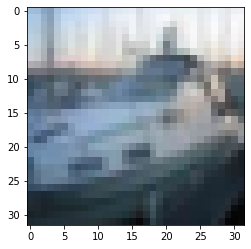

In [50]:
a = a.permute(1,2,0)
_ = plt.imshow(a)

In [51]:
class BN_LN_IN_VGGLike(nn.Module):
    def __init__(self, model_params):
        super().__init__()
        
        pool_idx = 0
        block_idx = 0
        current_hw = 32
        self.conv = nn.Sequential()
        prev_filt_size = model_params['input_shape'][0]
        for filt_size in model_params['filters']:
            self.conv.add_module(f'conv_{block_idx}', nn.Conv2d(prev_filt_size,
                                                  filt_size,
                                                  kernel_size=(3,3),
                                                  padding=(0,0),
                                                  stride=(1,1)
                                                 )
                            )
            
            if model_params['regulz_type'] == 'BatchNorm':
                self.conv.add_module(f'bn_{block_idx}', nn.BatchNorm2d(filt_size))
            if model_params['regulz_type'] == 'LayerNorm':
                self.conv.add_module(f'ln_{block_idx}', nn.LayerNorm((filt_size, current_hw, current_hw))) 
            if model_params['regulz_type'] == 'SpLayerNorm':
                self.conv.add_module(f'sln_{block_idx}', nn.LayerNorm((current_hw, current_hw)))
            if model_params['regulz_type'] == 'InstanceNorm':
                self.conv.add_module(f'in_{block_idx}', nn.InstanceNorm2d(filt_size))
            self.conv.add_module(f'actv_{block_idx}', nn.ELU(model_params['elu_alpha']))
            block_idx += 1
            if pool_idx < len(model_params['pool_positions']):
                if block_idx == model_params['pool_positions'][pool_idx]:
                    self.conv.add_module(f'maxpool_{block_idx}', nn.MaxPool2d((model_params['pool_factor'], model_params['pool_factor'])))
                    pool_idx += 1
                    block_idx += 1
                    current_hw *= 1/2
                    current_hw = int(current_hw)
            prev_filt_size = filt_size
            
        self.head = nn.Sequential()
        self.head.add_module('lin', nn.Linear(model_params['filters'][-1], model_params['filters'][-1]))
        self.head.add_module('elu', nn.ELU(model_params['elu_alpha']))
        self.head.add_module('clf', nn.Linear(model_params['filters'][-1], model_params['classes_nb']))
    
        
    
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.shape[0], -1)
        x = self.head(x)
        return x

In [52]:
def conv2dWeightInit(x):
    if isinstance(x, nn.Conv2d):
        torch.nn.init.xavier_normal_(x.weight)
        torch.nn.init.zeros_(x.bias)
        
def linearWeightInit(x):
    if isinstance(x, nn.Linear):
        torch.nn.init.xavier_normal_(x.weight)
        torch.nn.init.zeros_(x.bias)

class VGGLike(pl.LightningModule):
    def __init__(self, model_params, logpath='.', seed=42):
        super().__init__()
        self.history = {
                        'train_loss': [],
                        'train': {'loss':[], 'acc':[]},
                        'val': {'loss':[], 'acc':[]}
                       }
        
        self.seed = seed
        self.model_params = model_params
        self.model = None
        self.configureModel()
        self.transform = transforms.Compose([
            transforms.ToTensor()])

        self.targets = []
        self.predicts = []
        self.confusion_matrix = torch.zeros(self.model_params['classes_nb'], 
                                            self.model_params['classes_nb'], dtype=int)
        self.logpath = logpath
        self.vis_dir = 'conf_matrix'
        self.ckpt_every_dir = 'every'
        
        os.makedirs(self.logpath+'/'+self.vis_dir, exist_ok=True)
        os.makedirs(self.logpath+'/checkpoints/'+self.ckpt_every_dir, exist_ok=True)
        
        
    def setSeeds(self):
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
        torch.manual_seed(self.seed)
        torch.cuda.manual_seed_all((self.seed+1)*2)
        np.random.seed((self.seed+2)*3)
        random.seed((self.seed+3)*4)
        
        
    def configureModel(self):
        if self.model_params['regulz_type'] in ('BatchNorm', 'LayerNorm', 'SpLayerNorm', 'InstanceNorm', 'None'):
            self.model = BN_LN_IN_VGGLike(self.model_params)
        if self.model_params['regulz_type'] in ('WeightNorm'):
            self.model = WN_VGGLike(self.model_params)
        
        self.setSeeds()
        self.model.apply(conv2dWeightInit)
        self.model.apply(linearWeightInit)
        
    def forward(self, x):
        return self.model(x)


    @pl.data_loader
    def train_dataloader(self):
        train_data = torchvision.datasets.CIFAR10('./data', train=True, transform=self.transform)
        data_loader = torch.utils.data.DataLoader(train_data,
                                                  batch_size=self.model_params['batch_size'], 
                                                  shuffle=True,
                                                  num_workers=4)
        if self.seed:
            self.setSeeds()
        return data_loader
    
    @pl.data_loader
    def val_dataloader(self):
        val_data = torchvision.datasets.CIFAR10('./data', train=False, transform=self.transform)
        data_loader = torch.utils.data.DataLoader(val_data,
                                                  batch_size=self.model_params['batch_size'],
                                                  num_workers=4)
        return data_loader
    
    
    def calc_loss(self, logits, target):
        loss = F.cross_entropy(logits, target)
        return loss
    
    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=5e-4, weight_decay=self.model_params['weight_decay'])


    def calc_confusion_matrix(self):
        targets = torch.cat(self.targets)
        preds = torch.cat(self.predicts)
        self.confusion_matrix = confusion_matrix(preds, targets).detach().cpu()
                    
    def visualize_confustion_matrix(self, normalize=True):
        if normalize:
            self.confusion_matrix_norm = self.confusion_matrix/self.confusion_matrix.sum(dim=1)
        fig, ax = plt.subplots(figsize=(8,6), dpi=200)
        sns.heatmap(self.confusion_matrix_norm, ax=ax, cmap='Blues', vmin=0, vmax=1, annot=self.confusion_matrix.int(), fmt='d')
        ax.set_xlabel('PREDICTED', fontsize=14)
        ax.set_ylabel('GROUND TRUTH', fontsize=14)
        ax.set_title(f'Epoch_{self.trainer.current_epoch}', fontsize=14)
        ax.set_xticklabels(model_params['classes'], rotation=65, fontsize=12)
        ax.set_yticklabels(model_params['classes'], rotation=0, fontsize=12)
        fig.savefig(self.logpath+'/'+self.vis_dir+f'/epoch_{self.trainer.current_epoch}.png', bbox_inches="tight")
        plt.close('all')
        
    def save_model(self):
        path = self.trainer.logger.log_dir.split(os.path.sep)
        path.append('checkpoints')
        path.append(self.ckpt_every_dir)
        path = os.path.sep.join(path)
        self.trainer.save_checkpoint(path + f'/epoch={self.trainer.current_epoch}.ckpt')
    
    def training_step(self, batch, batch_idx):
        image, target = batch
        logits = self.model(image)
        loss = self.calc_loss(logits, target)
        metrics = {
            'acc': (logits.max(dim=1)[1] == target).sum().float()/len(target)
        }
        outputs = {
            'loss': loss,
            'metrics': metrics
        }
        self.history['train_loss'].append(loss.item())
        return outputs
    
    
    def training_epoch_end(self, outputs):
        loss = torch.stack([x['loss'] for x in outputs])
        avg_loss = loss.mean()
        self.history['train']['loss'].append(avg_loss.item())
        
        for metric in outputs[0]['metrics'].keys():
            metric_values = torch.stack([x['metrics'][metric] for x in outputs])
            avg_metric = metric_values.mean()
            self.history['train'][metric].append(avg_metric.item())
        return {
            'train_loss': avg_loss
        }
    
    
    def validation_step(self, batch, batch_idx):
        image, target = batch
        logits = self.model(image)
        loss = self.calc_loss(logits, target)
        class_preds = logits.max(dim=1)[1]
        
        self.predicts.append(class_preds)
        self.targets.append(target)
        
        metrics = {
            'acc': (class_preds == target).sum().float()/len(target)
        }
        outputs = {
            'loss': loss,
            'metrics': metrics
        }
        return outputs

            
    def validation_epoch_end(self, outputs):
        loss = torch.stack([x['loss'] for x in outputs])
        avg_loss = loss.mean()
        self.history['val']['loss'].append(avg_loss.item())
        
        self.save_model()
        self.calc_confusion_matrix()
        self.visualize_confustion_matrix(normalize=True)
        self.targets = []
        self.predicts = []

        if self.trainer.current_epoch%50 == 0:
            print(self.trainer.current_epoch)
        
        for metric in outputs[0]['metrics'].keys():
            metric_values = torch.stack([x['metrics'][metric] for x in outputs])
            avg_metric = metric_values.mean()
            self.history['val'][metric].append(avg_metric.item())
        return {
            'val_loss': avg_loss,
            'val_acc': torch.FloatTensor([self.history['val']['acc'][-1]])
        }

In [53]:
import random
import os
import sys
import torchvision.transforms as transforms

In [54]:
classes =[
     'airplane',
     'automobile',
     'bird',
     'cat',
     'deer',
     'dog',
     'frog',
     'horse',
     'ship',
     'truck'
]

model_params = {
    'filters': [10, 15, 25, 35, 55, 75],
    'pool_positions': [2, 5], # indexing start from 0
    'regulz_type': 'None',
    'pool_factor': 2,
    'classes': classes,
    'classes_nb': 10,
    'input_shape': [3, 32, 32], # [C, H, W]
    'weight_decay': 0.01,
    'elu_alpha': 1,
    'batch_size': 256
}

model = VGGLike(model_params)

In [58]:
checkpoint = torch.load('./logs/_part2/wdecay_0.005/fnb_6--fbase_5--wdecay_0.005--elu_1--NONE_/checkpoints/best/epoch=72.ckpt')

In [59]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [60]:
model

VGGLike(
  (model): BN_LN_IN_VGGLike(
    (conv): Sequential(
      (conv_0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
      (actv_0): ELU(alpha=1)
      (conv_1): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1))
      (actv_1): ELU(alpha=1)
      (maxpool_2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
      (conv_3): Conv2d(15, 25, kernel_size=(3, 3), stride=(1, 1))
      (actv_3): ELU(alpha=1)
      (conv_4): Conv2d(25, 35, kernel_size=(3, 3), stride=(1, 1))
      (actv_4): ELU(alpha=1)
      (maxpool_5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
      (conv_6): Conv2d(35, 55, kernel_size=(3, 3), stride=(1, 1))
      (actv_6): ELU(alpha=1)
      (conv_7): Conv2d(55, 75, kernel_size=(3, 3), stride=(1, 1))
      (actv_7): ELU(alpha=1)
    )
    (head): Sequential(
      (lin): Linear(in_features=75, out_features=75, bias=True)
      (clf): Linear(in_features=75, out_features=10, bias=True)
   

In [98]:
a = torchvision.transforms.ToTensor()
a = a(val.data[2])

In [99]:
val.classes[model(a.unsqueeze(0)).argmax()]

'ship'

In [131]:
a = plt.imread('./temp_data/3.jpg')

In [132]:
import cv2 as cv

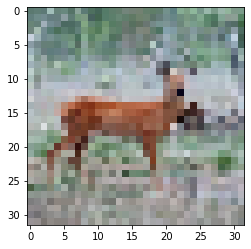

In [133]:
a = cv.resize(a, dsize=(32,32))
plt.imshow(a)

In [134]:
t = torchvision.transforms.ToTensor()
a = t(a)

In [135]:
val.classes[model(a.unsqueeze(0)).argmax()]

'deer'